In [1]:
#ISM 4641 Project-Ha Tran and Adithya Venkatramanan

In [2]:
#Import libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Data Inspection
df=pd.read_csv(r"C:\Users\svrad\OneDrive\University of South Florida\Semester 5\ISM 4641\Project Content\Electronic_sales_Sep2023-Sep2024.csv")

In [4]:
df.head(5)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [5]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Loyalty Member', 'Product Type', 'SKU',
       'Rating', 'Order Status', 'Payment Method', 'Total Price', 'Unit Price',
       'Quantity', 'Purchase Date', 'Shipping Type', 'Add-ons Purchased',
       'Add-on Total'],
      dtype='object')

In [6]:
df.shape

(20000, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

In [8]:
#Missing Data
df.isnull().sum()*100/len(df)

Customer ID           0.000
Age                   0.000
Gender                0.005
Loyalty Member        0.000
Product Type          0.000
SKU                   0.000
Rating                0.000
Order Status          0.000
Payment Method        0.000
Total Price           0.000
Unit Price            0.000
Quantity              0.000
Purchase Date         0.000
Shipping Type         0.000
Add-ons Purchased    24.340
Add-on Total          0.000
dtype: float64

In [9]:
df['Add-ons Purchased'] = df['Add-ons Purchased'].fillna('None')
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,None,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,None,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,None,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


In [10]:
numeric_df = df.select_dtypes(include=['number'])

In [11]:
# Calculate the counts for 'M' and 'F'
gender_counts = df['Gender'].value_counts()
total = gender_counts.sum()

# Calculate probabilities for each gender
prob_male = gender_counts['Male'] / total
prob_female = gender_counts['Female'] / total

# Define a function to impute missing values
def impute_gender(x):
    if pd.isna(x) or x == ' ':
        return np.random.choice(['Male', 'Female'], p=[prob_male, prob_female])
    return x

# Apply the function to fill missing values in the Gender column
df['Gender'] = df['Gender'].apply(impute_gender)

In [12]:
df.isnull().sum()*100/len(df)

Customer ID          0.0
Age                  0.0
Gender               0.0
Loyalty Member       0.0
Product Type         0.0
SKU                  0.0
Rating               0.0
Order Status         0.0
Payment Method       0.0
Total Price          0.0
Unit Price           0.0
Quantity             0.0
Purchase Date        0.0
Shipping Type        0.0
Add-ons Purchased    0.0
Add-on Total         0.0
dtype: float64

In [13]:
df['Final Price']=df['Total Price']+df['Add-on Total']
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Final Price
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21,5578.54
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,767.18
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,None,0.00,1855.84
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,3224.92
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,77.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,None,0.00,6838.08
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,None,0.00,2697.28
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98,2004.88
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34,2629.60


In [14]:
#Summary Statistics
df.describe()

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total,Final Price
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848,3242.378266
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431,2550.507413
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000,20.750000
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000,1205.550000
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000,2601.240000
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500,4724.100000
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000,11655.120000


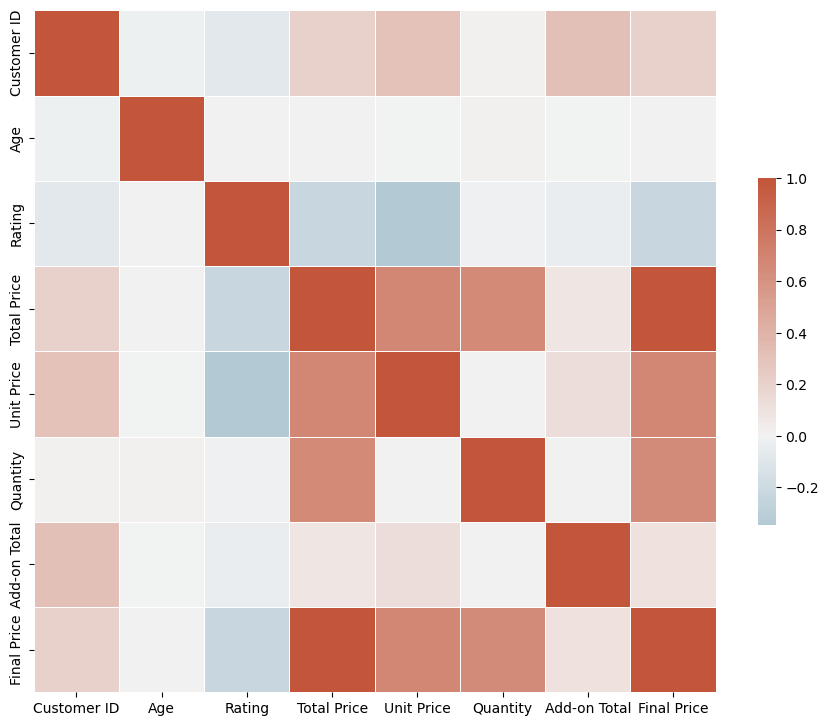

In [15]:
# Correlation
corr = df.corr(numeric_only=True)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

C:\Users\svrad\AppData\Local\Temp\ipykernel_18032\448786005.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Age Group', 'Gender'])['Final Price'].sum().unstack()


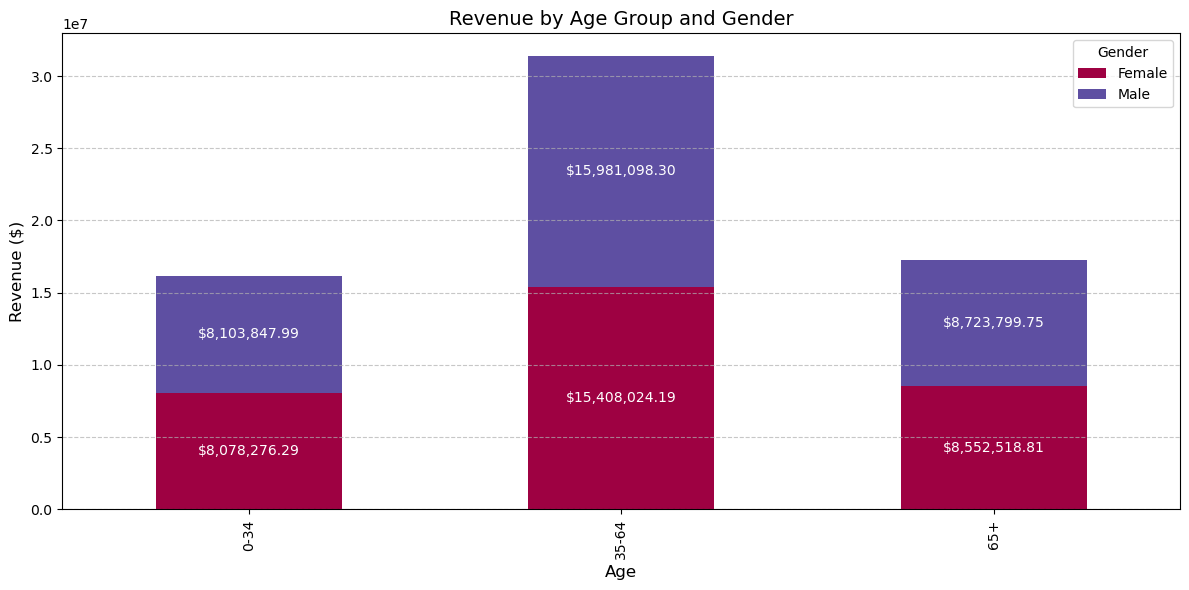

In [16]:
# Plots
# Create age groups
bins = [0,34,64,100]  # Define age ranges
labels = ['0-34','35-64','65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
# Group data by Age and Gender and sum the profits
grouped_data = df.groupby(['Age Group', 'Gender'])['Final Price'].sum().unstack()
ax=grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Spectral')
# Customize the chart
plt.title('Revenue by Age Group and Gender', fontsize=14)
# Add annotations
for i, (age_group, gender_data) in enumerate(grouped_data.iterrows()):
    cumulative = 0  # Initialize the cumulative value to track the position of each gender in the stack
    for j, gender in enumerate(grouped_data.columns):
        value = gender_data[gender]
        if value > 0:
            # Position the annotation at the top of each stacked segment
            ax.text(
                i,  # x-coordinate (age group index)
                cumulative + value / 2,  # y-coordinate (half of the segment height)
                f'${value:,.2f}',  # Format the value as currency
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment (center within the segment)
                fontsize=10,  # Font size
                color='white'  # Set annotation color to red
            )
            cumulative += value  # Update cumulative value for next segment
plt.xlabel('Age', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.legend(title='Gender', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the chart
plt.show()

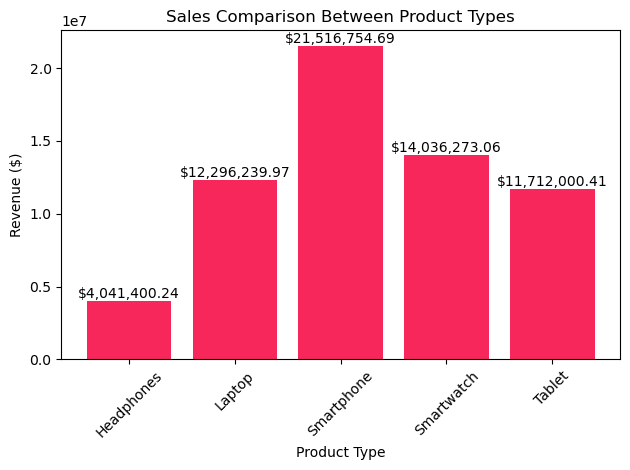

In [17]:
Revenue = df.groupby('Product Type')['Total Price'].sum()
for index, value in enumerate(Revenue.values):
    plt.text(
        index,                   # x-coordinate of the text
        value ,  # y-coordinate slightly above the bar
        f'${value:,.2f}',        # Format value as currency (e.g., $1,234.56)
        ha='center',             # Horizontal alignment
        va='bottom',             # Vertical alignment
        fontsize=10              # Font size for annotations
    )
plt.bar(Revenue.index, Revenue.values, color = "#F8275B")
plt.xlabel('Product Type')
plt.ylabel('Revenue ($)')
plt.title('Sales Comparison Between Product Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
#ADD CODE FOR LATEST VISUAL

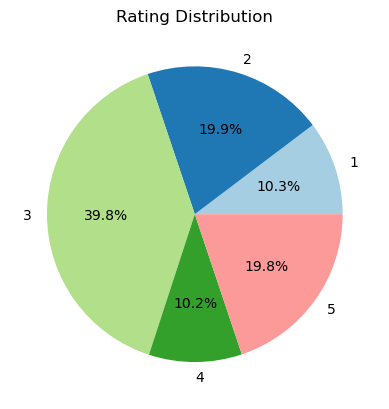

In [19]:
# Count the occurrences of each unique rating
rating_counts = df['Rating'].value_counts().sort_index()

# Create a pie chart
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Rating Distribution')
plt.show()

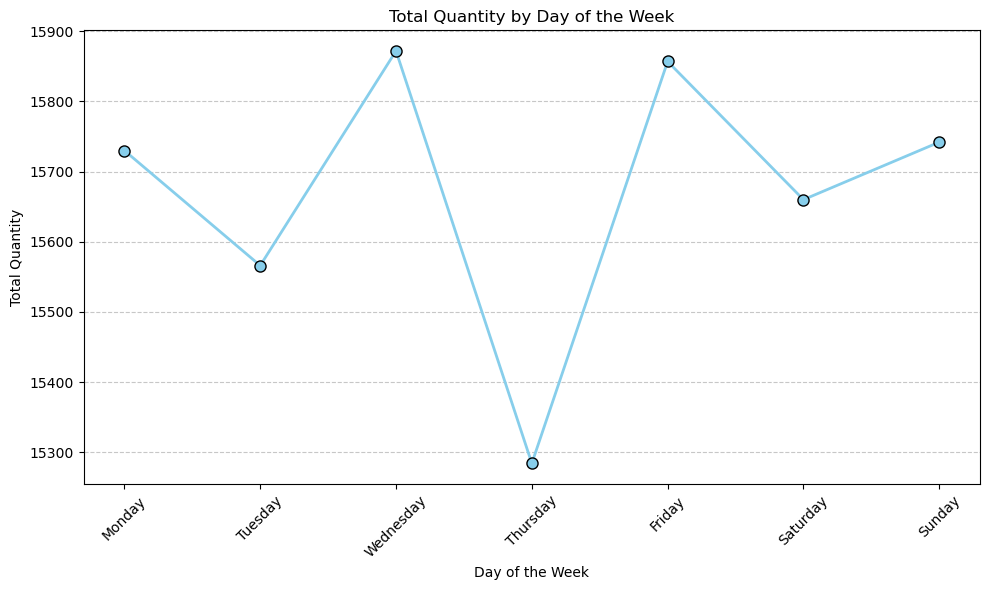

In [20]:
import matplotlib.pyplot as plt

# Ensure 'Purchase Date' is in datetime format
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')

# Extract the day of the week from 'Purchase Date'
df['Day of Week'] = df['Purchase Date'].dt.day_name()

# Group by day of the week and calculate the total 'Quantity'
total_quantity_by_day = df.groupby('Day of Week')['Quantity'].sum()

# Sort days of the week in chronological order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_quantity_by_day = total_quantity_by_day.reindex(day_order)

# Plotting
plt.figure(figsize=(10, 6))
total_quantity_by_day.plot(kind='line', marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8, markeredgecolor='black')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by Day of the Week')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Final Price,Age Group,Day of Week
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21,5578.54,35-64,Wednesday
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,767.18,35-64,Saturday
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,None,0.00,1855.84,35-64,Tuesday
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,3224.92,35-64,Friday
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,77.06,65+,Tuesday


In [22]:
# Non-numeric feature
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop=None, sparse_output=False)

# Fit and transform the Gender column
encoded = encoder.fit_transform(df[['Gender']])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Gender']), index=df.index)

# Merge the encoded columns back to the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [23]:
encoder = OneHotEncoder(drop=None, sparse_output=False)

# Fit and transform the Gender column
encoded = encoder.fit_transform(df[['Loyalty Member']])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Loyalty Member']), index=df.index)

# Merge the encoded columns back to the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [24]:
encoder = OneHotEncoder(drop=None, sparse_output=False)

# Fit and transform the Gender column
encoded = encoder.fit_transform(df[['Order Status']])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Order Status']), index=df.index)

# Merge the encoded columns back to the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [25]:
encoder = OneHotEncoder(drop=None, sparse_output=False)

# Fit and transform the Payment Method column
encoded = encoder.fit_transform(df[['Payment Method']])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Payment Method']), index=df.index)

# Merge the encoded columns back to the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [26]:
encoder = OneHotEncoder(drop=None, sparse_output=False)

# Fit and transform the Payment Method column
encoded = encoder.fit_transform(df[['Product Type']])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Product Type']), index=df.index)

# Merge the encoded columns back to the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [27]:
encoder = OneHotEncoder(drop=None, sparse_output=False)

# Fit and transform the Payment Method column
encoded = encoder.fit_transform(df[['Shipping Type']])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Shipping Type']), index=df.index)

# Merge the encoded columns back to the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [28]:
df=df.drop('Gender', axis=1)
df=df.drop('Loyalty Member', axis=1)
df=df.drop('Product Type', axis=1)
df=df.drop('Order Status', axis=1)
df=df.drop('Payment Method', axis=1)
df=df.drop('Shipping Type', axis=1)
df=df.drop('Day of Week', axis=1)

df.head()

,Customer ID,Age,SKU,Rating,Total Price,Unit Price,Quantity,Purchase Date,Add-ons Purchased,Add-on Total,...,Product Type_Headphones,Product Type_Laptop,Product Type_Smartphone,Product Type_Smartwatch,Product Type_Tablet,Shipping Type_Expedited,Shipping Type_Express,Shipping Type_Overnight,Shipping Type_Same Day,Shipping Type_Standard
0,1000,53,SKU1004,2,5538.33,791.19,7,2024-03-20,"Accessory,Accessory,Accessory",40.21,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1000,53,SKU1002,3,741.09,247.03,3,2024-04-20,Impulse Item,26.09,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1002,41,SKU1005,3,1855.84,463.96,4,2023-10-17,None,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1002,41,SKU1004,2,3164.76,791.19,4,2024-08-09,"Impulse Item,Impulse Item",60.16,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1003,75,SKU1001,5,41.50,20.75,2,2024-05-21,Accessory,35.56,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
#Feature Creation

from sklearn.preprocessing import StandardScaler
df['Purchase Day'] = pd.to_datetime(df['Purchase Date']).dt.day_name()  # Day of the week
df['Purchase Month'] = pd.to_datetime(df['Purchase Date']).dt.month  # Month

In [30]:
df.drop(['Purchase Date'], axis=1, inplace=True)

In [31]:
df = pd.get_dummies(df, columns=['Purchase Day'], drop_first=False)

In [32]:
#Pandas is storing days of week as boolean instead of binary to optimize performance so we will be calculating accuracy scores instead of MAE

In [33]:
df.head()

,Customer ID,Age,SKU,Rating,Total Price,Unit Price,Quantity,Add-ons Purchased,Add-on Total,Final Price,...,Shipping Type_Same Day,Shipping Type_Standard,Purchase Month,Purchase Day_Friday,Purchase Day_Monday,Purchase Day_Saturday,Purchase Day_Sunday,Purchase Day_Thursday,Purchase Day_Tuesday,Purchase Day_Wednesday
0,1000,53,SKU1004,2,5538.33,791.19,7,"Accessory,Accessory,Accessory",40.21,5578.54,...,0.0,1.0,3,False,False,False,False,False,False,True
1,1000,53,SKU1002,3,741.09,247.03,3,Impulse Item,26.09,767.18,...,0.0,0.0,4,False,False,True,False,False,False,False
2,1002,41,SKU1005,3,1855.84,463.96,4,None,0.00,1855.84,...,0.0,0.0,10,False,False,False,False,False,True,False
3,1002,41,SKU1004,2,3164.76,791.19,4,"Impulse Item,Impulse Item",60.16,3224.92,...,0.0,0.0,8,True,False,False,False,False,False,False
4,1003,75,SKU1001,5,41.50,20.75,2,Accessory,35.56,77.06,...,0.0,0.0,5,False,False,False,False,False,True,False


In [34]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [35]:
# Split train and test sets
# For training data
train_X = train_set.drop(['Customer ID', 'SKU', 'Add-ons Purchased', 'Age Group', 'Shipping Type_Overnight'], axis=1)  # drop labels for training set
train_y = train_set['Shipping Type_Overnight'].copy()

# For test data
test_X = test_set.drop(['Customer ID', 'SKU', 'Add-ons Purchased', 'Age Group', 'Shipping Type_Overnight'], axis=1)  # drop labels for training set
test_y = test_set['Shipping Type_Overnight'].copy()

In [36]:
train_X

,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total,Final Price,Gender_Female,Gender_Male,Loyalty Member_No,...,Shipping Type_Same Day,Shipping Type_Standard,Purchase Month,Purchase Day_Friday,Purchase Day_Monday,Purchase Day_Saturday,Purchase Day_Sunday,Purchase Day_Thursday,Purchase Day_Tuesday,Purchase Day_Wednesday
5894,27,5,124.50,20.75,6,0.00,124.50,1.0,0.0,0.0,...,0.0,0.0,7,False,False,True,False,False,False,False
3728,67,3,2534.49,844.83,3,63.58,2598.07,1.0,0.0,0.0,...,0.0,0.0,3,False,False,False,True,False,False,False
8958,52,5,20.75,20.75,1,0.00,20.75,0.0,1.0,1.0,...,0.0,1.0,5,False,False,True,False,False,False,False
7671,52,3,927.92,463.96,2,82.50,1010.42,0.0,1.0,1.0,...,0.0,1.0,2,False,True,False,False,False,False,False
5999,61,3,7603.47,844.83,9,49.85,7653.32,0.0,1.0,1.0,...,0.0,0.0,7,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,59,3,4720.24,674.32,7,184.25,4904.49,1.0,0.0,1.0,...,0.0,1.0,1,False,False,False,True,False,False,False
11964,77,1,7977.76,1139.68,7,0.00,7977.76,1.0,0.0,1.0,...,0.0,1.0,4,False,False,False,False,False,False,True
5390,23,3,4224.15,844.83,5,0.00,4224.15,1.0,0.0,1.0,...,0.0,0.0,11,True,False,False,False,False,False,False
860,37,3,3711.68,463.96,8,56.23,3767.91,1.0,0.0,1.0,...,0.0,0.0,3,False,False,False,False,False,False,True


In [37]:
test_X

,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total,Final Price,Gender_Female,Gender_Male,Loyalty Member_No,...,Shipping Type_Same Day,Shipping Type_Standard,Purchase Month,Purchase Day_Friday,Purchase Day_Monday,Purchase Day_Saturday,Purchase Day_Sunday,Purchase Day_Thursday,Purchase Day_Tuesday,Purchase Day_Wednesday
10650,63,4,5394.56,674.32,8,0.00,5394.56,1.0,0.0,1.0,...,0.0,0.0,5,False,False,False,False,True,False,False
2041,35,3,1976.24,247.03,8,0.00,1976.24,0.0,1.0,0.0,...,0.0,1.0,4,False,False,False,False,True,False,False
8668,49,3,2534.49,844.83,3,19.68,2554.17,1.0,0.0,1.0,...,0.0,0.0,6,True,False,False,False,False,False,False
1114,69,2,5538.33,791.19,7,0.00,5538.33,1.0,0.0,1.0,...,0.0,0.0,10,False,False,True,False,False,False,False
13902,35,5,4045.92,674.32,6,0.00,4045.92,0.0,1.0,0.0,...,1.0,0.0,7,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073,55,3,4224.15,844.83,5,70.14,4294.29,1.0,0.0,1.0,...,0.0,0.0,3,False,False,False,True,False,False,False
7442,20,3,1689.66,844.83,2,0.00,1689.66,1.0,0.0,0.0,...,0.0,0.0,5,True,False,False,False,False,False,False
9999,27,3,927.92,463.96,2,22.50,950.42,0.0,1.0,1.0,...,0.0,0.0,5,True,False,False,False,False,False,False
1870,63,5,124.50,20.75,6,27.78,152.28,1.0,0.0,0.0,...,0.0,0.0,4,False,False,False,False,True,False,False


In [38]:
# Model training
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(train_X, train_y)

SVC()

In [39]:
#Explain, predict, or both
yhat_train = svc_model.predict(train_X)
yhat_test = svc_model.predict(test_X)

In [40]:
# Evaluation
from sklearn.metrics import mean_absolute_error

In [41]:
#evaluate in-sample predictions
mean_absolute_error(train_y, yhat_train)

0.1674375

In [42]:
#evaluate out-of-sample predictions
mean_absolute_error(test_y, yhat_test)

0.1695

In [43]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [44]:
# Split train and test sets
# For training data
train_X = train_set.drop(['Customer ID', 'SKU', 'Add-ons Purchased', 'Age Group', 'Loyalty Member_Yes'], axis=1)  # drop labels for training set
train_y = train_set['Loyalty Member_Yes'].copy()

# For test data
test_X = test_set.drop(['Customer ID', 'SKU', 'Add-ons Purchased', 'Age Group', 'Loyalty Member_Yes'], axis=1)  # drop labels for training set
test_y = test_set['Loyalty Member_Yes'].copy()

In [45]:
# Model training
svc_model_2 = SVC()
svc_model_2.fit(train_X, train_y)

SVC()

In [46]:
#Explain, predict, or both
yhat_train = svc_model_2.predict(train_X)
yhat_test = svc_model_2.predict(test_X)

In [47]:
# Evaluation
from sklearn.metrics import mean_absolute_error

In [48]:
#evaluate in-sample predictions
mean_absolute_error(train_y, yhat_train)

0.2161875

In [49]:
#evaluate out-of-sample predictions
mean_absolute_error(test_y, yhat_test)

0.221

In [50]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [51]:
# Split train and test sets
# For training data
train_X = train_set.drop(['Customer ID', 'SKU', 'Add-ons Purchased', 'Age Group', 'Purchase Day_Thursday'], axis=1)  # drop labels for training set
train_y = train_set['Purchase Day_Thursday'].copy()

# For test data
test_X = test_set.drop(['Customer ID', 'SKU', 'Add-ons Purchased', 'Age Group', 'Purchase Day_Thursday'], axis=1)  # drop labels for training set
test_y = test_set['Purchase Day_Thursday'].copy()

In [52]:
# Model training
svc_model_3 = SVC()
svc_model_3.fit(train_X, train_y)

SVC()

In [53]:
#Explain, predict, or both
yhat_train = svc_model_3.predict(train_X)
yhat_test = svc_model_3.predict(test_X)

In [54]:
# Evaluation
from sklearn.metrics import accuracy_score

In [55]:
#evaluate in-sample predictions
print(accuracy_score(train_y, yhat_train))

0.8600625


In [56]:
#evaluate out-of-sample predictions
print(accuracy_score(test_y, yhat_test))

0.8715
